In [5]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [6]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [4]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# def features (df):
#     columns_to_drop=['EmployeeID','EmployeeCount','Gender','MonthlyRate','HourlyRate','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
#     df.drop(columns=columns_to_drop, inplace=True)
#     df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
#     df['Education']= np.where(df['Education'] == 5, 1, 0)
#     df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
#     df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
#     df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
#     df['JobLevel'] = np.where(df['JobLevel'] == 1, 1, np.where(df['JobLevel'] == 2, 2, np.where(df['JobLevel'] == 4, 2, 0)))
#     df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
#     df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
#     df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
#     df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
#     df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
#     return df


In [5]:
# features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,1,0,0,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,1,0,1,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,1,0,1,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,1,0,0,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,1,1,0,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,1,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,1,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,1,0,1,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,1,0,1,...,1,0,0,21,3,0,21,6,11,8


Training Accuracy: 0.9703640982218459
Testing Accuracy: 0.9196428571428571
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       296
           1       0.66      0.68      0.67        40

    accuracy                           0.92       336
   macro avg       0.81      0.81      0.81       336
weighted avg       0.92      0.92      0.92       336



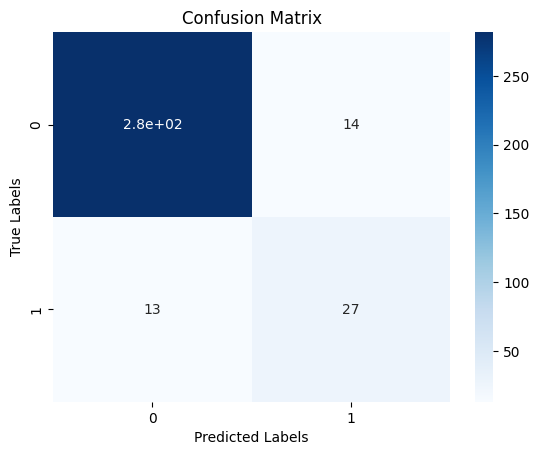

[0.02 0.04 0.08 0.1  0.02 0.02 0.04 0.04 0.06 0.   0.02 0.04 0.04 0.08
 0.08 0.02 0.04 0.02 0.02 0.02 0.02 0.06 0.02 0.04 0.06 0.  ]


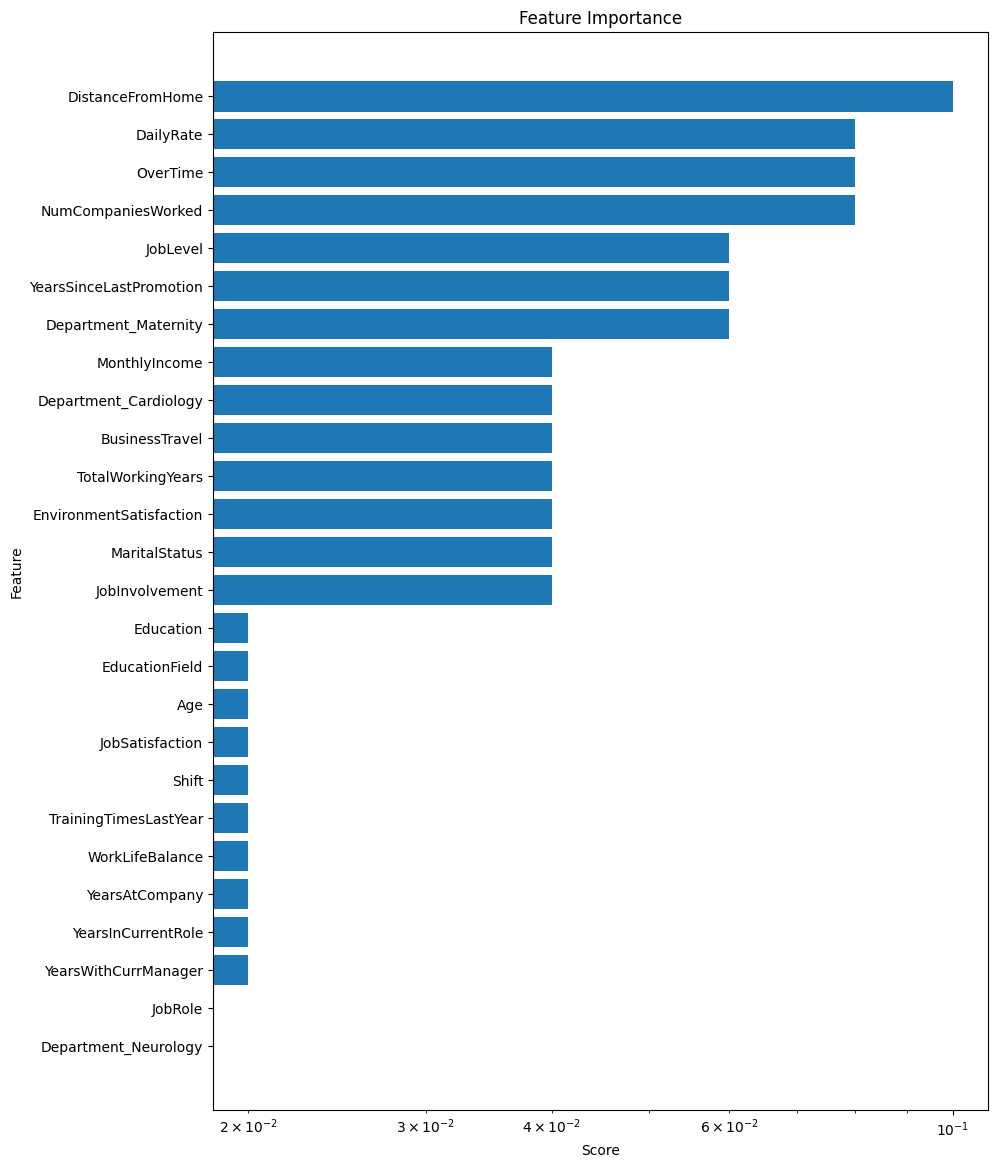

In [7]:

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

def features (df):
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','MonthlyRate','HourlyRate','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
    df.drop(columns=columns_to_drop, inplace=True)
    df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
    df['Education']= np.where(df['Education'] == 5, 1, 0)
    df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
    df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
    df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
    df['JobLevel'] = np.where(df['JobLevel'] == 1, 1, np.where(df['JobLevel'] == 2, 2, np.where(df['JobLevel'] == 4, 2, 0)))
    df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
    df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
    df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
    df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    return df

features(df)

#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']
y= y.replace({'No':0,'Yes':1})


# Select numerical and categorical features
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_features),
    ]
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
numerical_feature_names = list(numerical_features)
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_names = numerical_feature_names + categorical_feature_names

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)


#Balancing the data
smote = SMOTE()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)

# Modeling
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#feature importance score and plot them
feature_importance = model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')
plt.show()

In [4]:
import pickle

# Save the model
pickle.dump(model, open('model.p', 'wb'))
pickle.dump(X_train.columns, open('columns.p', 'wb'))




In [70]:
json_= [
    {
    "EmployeeID" : 1699288,
    "Age" : 30,
    "BusinessTravel" : "Travel_Rarely",
    "DailyRate" : 1358,
    "Department" : "Maternity",
    "DistanceFromHome" : 24,
    "Education" : 1,
    "EducationField" : "Life Sciences",
    "EmployeeCount" : 1,
    "EnvironmentSatisfaction" :4,
    "Gender" : "Male",
    "HourlyRate" : 67,
    "JobInvolvement" : 3,
    "JobLevel": 1,
    "JobRole" : "Nurse",
    "JobSatisfaction" : 3,
    "MaritalStatus" : "Divorced",
    "MonthlyIncome" : 2693,
    "MonthlyRate" : 13335,
    "NumCompaniesWorked" : 1,
    "Over18" : "Y",
    "OverTime" : "No",
    "PercentSalaryHike" : 22,
    "PerformanceRating" : 4,
    "RelationshipSatisfaction" : 2,
    "StandardHours"  : 80,
    "Shift" : 1,
    "TotalWorkingYears" : 1,
    "TrainingTimesLastYear" : 2,
    "WorkLifeBalance" : 3,
    "YearsAtCompany" : 1,
    "YearsInCurrentRole" : 0,
    "YearsSinceLastPromotion" : 0,
    "YearsWithCurrManager" :0

       }
]

In [71]:
print(json_)


[{'EmployeeID': 1699288, 'Age': 30, 'BusinessTravel': 'Travel_Rarely', 'DailyRate': 1358, 'Department': 'Maternity', 'DistanceFromHome': 24, 'Education': 1, 'EducationField': 'Life Sciences', 'EmployeeCount': 1, 'EnvironmentSatisfaction': 4, 'Gender': 'Male', 'HourlyRate': 67, 'JobInvolvement': 3, 'JobLevel': 1, 'JobRole': 'Nurse', 'JobSatisfaction': 3, 'MaritalStatus': 'Divorced', 'MonthlyIncome': 2693, 'MonthlyRate': 13335, 'NumCompaniesWorked': 1, 'Over18': 'Y', 'OverTime': 'No', 'PercentSalaryHike': 22, 'PerformanceRating': 4, 'RelationshipSatisfaction': 2, 'StandardHours': 80, 'Shift': 1, 'TotalWorkingYears': 1, 'TrainingTimesLastYear': 2, 'WorkLifeBalance': 3, 'YearsAtCompany': 1, 'YearsInCurrentRole': 0, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 0}]


In [72]:
query = pd.DataFrame(json_)
query

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1699288,30,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,4,...,2,80,1,1,2,3,1,0,0,0


In [73]:
features(query)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,0,1358,Maternity,24,0,1,0,0,1,...,1,0,0,1,2,0,1,0,0,0


In [74]:
query

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,0,1358,Maternity,24,0,1,0,0,1,...,1,0,0,1,2,0,1,0,0,0


In [75]:
query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1 non-null      int64 
 1   BusinessTravel           1 non-null      int32 
 2   DailyRate                1 non-null      int64 
 3   Department               1 non-null      object
 4   DistanceFromHome         1 non-null      int64 
 5   Education                1 non-null      int32 
 6   EducationField           1 non-null      int32 
 7   EnvironmentSatisfaction  1 non-null      int32 
 8   JobInvolvement           1 non-null      int32 
 9   JobLevel                 1 non-null      int32 
 10  JobRole                  1 non-null      int32 
 11  JobSatisfaction          1 non-null      int64 
 12  MaritalStatus            1 non-null      int32 
 13  MonthlyIncome            1 non-null      int64 
 14  NumCompaniesWorked       1 non-null      int64

In [76]:
# Select numerical and categorical features
numerical_features = query.select_dtypes(include='number').columns
categorical_features = query.select_dtypes(include='object').columns

# Define the column transformer
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical columns
                        ('cat', OneHotEncoder(), categorical_features),
                    ]
                )

        # Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(query)

        # Get the feature names after transformation
numerical_feature_names = list(numerical_features)
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_names = numerical_feature_names + categorical_feature_names

    
#Convert the transformed data to a DataFrame with column labels
query = pd.DataFrame(transformed_data, columns=feature_names)

In [77]:
print(transformed_data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [78]:
query

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Maternity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
model_columns= X_train.columns
query = query.reindex(columns = model_columns, fill_value= 0)

In [80]:
query

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Cardiology,Department_Maternity,Department_Neurology
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0


In [81]:
prediction = list(model.predict(query))
print(prediction)

[1]
